# Decision Tree

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [4]:
row, column = df.shape
print("The number of rows:", row)
print("The number of colums:", column)

The number of rows: 200
The number of colums: 6


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>



<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


In [15]:
x_data = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x_data

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [16]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(['F', 'M'])
x_data[:,1] = le_sex.transform(x_data[:,1]) 

le_bp = LabelEncoder()
le_bp.fit(['LOW', 'NORMAL', 'HIGH'])
x_data[:,2] = le_bp.transform(x_data[:,2])

le_chol = LabelEncoder()
le_chol.fit(['LOW', 'NORMAL', 'HIGH'])
x_data[:,3] = le_chol.transform(x_data[:,3]) 

x_data

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 2, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 2, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 2, 15.516],
       [69, 1, 1, 2, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 2, 25.974],
       [57, 1, 1, 2, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 2, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 2, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 2, 9.381],
       [39, 0, 1, 2, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 2, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 2, 11.014],
       [65, 0, 0,

Filling the target variable:

In [18]:
y_data = df['Drug']

## Spliting the data

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [20]:
print("The shape of x_train:", x_train.shape)
print("The shape of y_train:", y_train.shape)

The shape of x_train: (140, 5)
The shape of y_train: (140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [21]:
print("The shape of x_test:", x_test.shape)
print("The shape of y_test:", y_test.shape)

The shape of x_test: (60, 5)
The shape of y_test: (60,)


<div id="modeling">
    <h2>Modeling</h2> <br />
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [22]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
predTree = drugTree.predict(x_test)

Let us check visually how it has ended up predicting the model:

In [26]:
print (predTree [0:5])
print (y_test [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<div id="evaluation">
    <h2>Evaluation</h2> <br />
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, predTree)

0.9833333333333333

**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


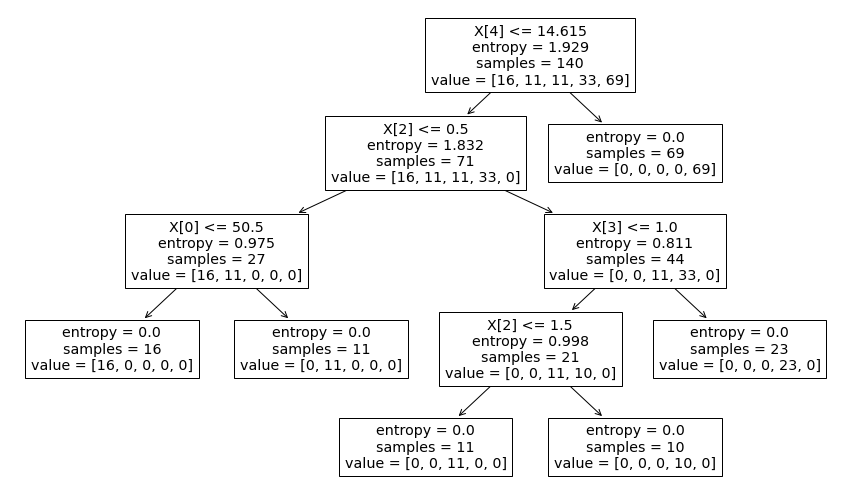

In [31]:
from sklearn import tree

plt.figure(figsize=(15, 9))
tree.plot_tree(drugTree)
plt.show()